In [4]:
import numpy as np
import pandas as pd

filename = 'sd-data_cleanedv5.csv'
raw_data = pd.read_csv(filename)

data = raw_data.values # converting from pandas dataframe to numpy array
attribute_names = np.asarray(raw_data.columns) # extracting the attribute names
print("These are the features:",attribute_names) # prints the attribute names

These are the features: ['SMK1' '2' '3' 'hear_right1' '2.1' 'hear_left1' '2.2' 'sex' 'age'
 'height' 'weight' 'waistline' 'sight_left' 'sight_right' 'SBP' 'DBP'
 'BLDS' 'tot_chole' 'HDL_chole' 'LDL_chole' 'triglyceride' 'hemoglobin'
 'urine_protein' 'serum_creatinine' 'SGOT_AST' 'SGOT_ALT' 'gamma_GTP'
 'DRK_YN']


In [5]:
# data in X,y format - y vector containing attribute 'DRK_YN' (drink yes/no)
X = np.delete(data, 27, axis=1)
y = data[:,27]

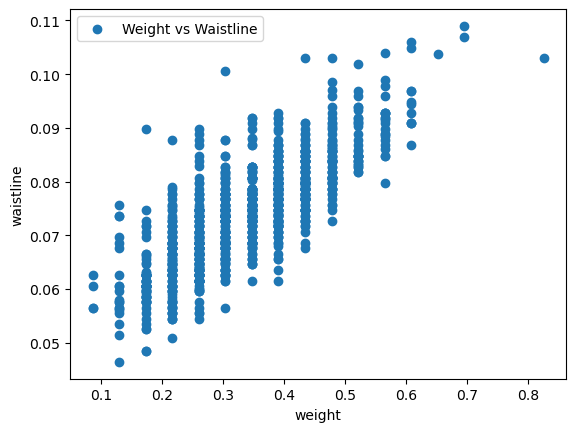

In [7]:
# in the following (for the first 1000 data points) the weight is plotted against the waistline.
# As one could somewhat expect there is a high correlation between these 2 attributes.
import matplotlib.pyplot as plt
A = data[0:1000,10]
B = data[0:1000,11]
plt.figure(1)
plt.scatter(A, B, label="Weight vs Waistline")
plt.xlabel(str(attribute_names[10]))
plt.ylabel(str(attribute_names[11]))
plt.legend()
plt.show()

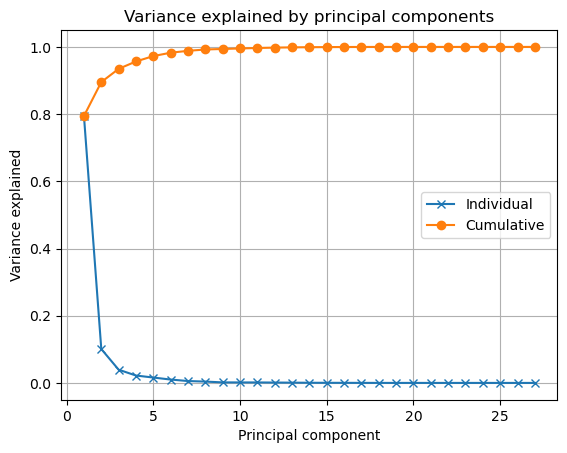

In [8]:
from scipy.linalg import svd

# PCA by computing SVD of Y
U,S,Vh = svd(X,full_matrices=False)
V = Vh.T    

rho = (S*S) / (S*S).sum() 

# plot of variance explained

plt.figure(2)
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative'])
plt.grid()
plt.show()

In [9]:
# How many pricipal comp for 95% explained
new_threshold = 0.95
sumit = 0
for i in range(len(rho)):
    sumit += rho[i]
    if sumit > new_threshold:
        print(str(i)+" principal comp for " +str(new_threshold)+ "% variance explained")
        break

3 principal comp for 0.95% variance explained


In [10]:
# Now we look at the first principal component to get a understanding about what features it captures
formatted_data = np.array([f'{x:.2f}' for x in V[:,0]])
print("These are the features:",attribute_names[:-1]), formatted_data

These are the features: ['SMK1' '2' '3' 'hear_right1' '2.1' 'hear_left1' '2.2' 'sex' 'age'
 'height' 'weight' 'waistline' 'sight_left' 'sight_right' 'SBP' 'DBP'
 'BLDS' 'tot_chole' 'HDL_chole' 'LDL_chole' 'triglyceride' 'hemoglobin'
 'urine_protein' 'serum_creatinine' 'SGOT_AST' 'SGOT_ALT' 'gamma_GTP']


(None,
 array(['-0.32', '-0.08', '-0.10', '-0.49', '-0.01', '-0.49', '-0.01',
        '-0.25', '-0.21', '-0.27', '-0.17', '-0.04', '-0.19', '-0.19',
        '-0.13', '-0.14', '-0.05', '-0.04', '-0.00', '-0.01', '-0.01',
        '-0.27', '-0.01', '-0.00', '-0.00', '-0.00', '-0.02'], dtype='<U5'))

To get a large (negative) projection onto v1, we need a person that meets the following : \
never smoked, normal hearing on both ears and high concentration of hemolobin. Age, height and weight also plays a role.

In [11]:
# Getting the full projection of the data
Z = X @ V

In [12]:
formatted_data2 = np.array([f'{x:.2f}' for x in V[:,1]])
formatted_data2

array(['-0.58', '0.28', '0.40', '0.12', '-0.01', '0.12', '-0.01', '-0.56',
       '0.00', '0.20', '0.12', '0.01', '0.08', '0.08', '0.04', '0.05',
       '0.01', '0.01', '0.00', '0.00', '0.01', '0.12', '0.00', '0.00',
       '0.00', '0.00', '0.02'], dtype='<U5')

v2: female nonsmoker for negative \
positive: used to/still smoke and is a high person and have high weight

In [13]:
classNames = ['Never', 'Used to smoke', 'Still smoke']
conditions = [
    (X[:, 0] == 1),
    (X[:, 1] == 1),
    (X[:, 2] == 1),
]
choices = [1, 2, 3]

y = np.select(conditions, choices, default=0)

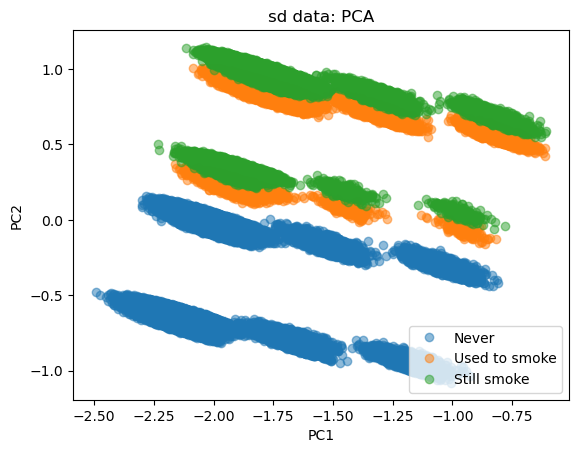

In [14]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend

# Plot PCA of the data
f = figure()
title('sd data: PCA')

for c in range(4):
    if c > 0:
        class_mask = y==c
        plot(Z[class_mask,0], Z[class_mask,1], 'o', alpha=.5)
legend(classNames, loc='lower right')
xlabel('PC{0}'.format(1))
ylabel('PC{0}'.format(2))

show()

Vi kan se på overstående, at især PC2 kan bruges til at klassificere om en person her "never" smoked, hvis vi projektere data ned i PC2 og vi får en negativ værdi

In [15]:
indicies_list_to_keep = []
for i in range(len(V[:,0])):
    if abs(V[:,0][i]) > 0.05 and abs(V[:,1][i]) > 0.05:
        indicies_list_to_keep.append(i)

PCs_ajusted = np.array([V[:,0][indicies_list_to_keep], V[:,1][indicies_list_to_keep]]).T

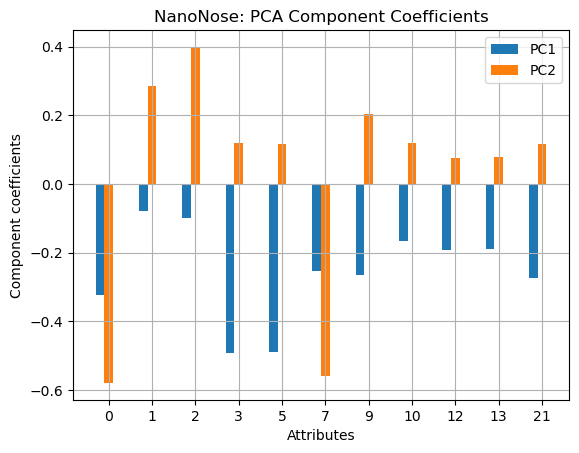

In [17]:
N,M = X.shape
# Interpret the principal directions

new_attributes = [str(int) for int in indicies_list_to_keep] 

pcs = [0, 1]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,12)
for i in pcs:    
    plt.bar(r+i*bw, PCs_ajusted[:,i], width=bw)
plt.xticks(r+bw, new_attributes)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.show()